In [1]:
import os
from options.test_options import TestOptions

In [12]:
!bash ./scripts/test_CarSON.sh

+ RESULTS_DIR=./results/sampledata
+ CARSON_PATH=./pretrained_models/carson_Jan2021.h5
+ CARMEN_PATH=./pretrained_models/carmen_Jan2021.h5
+ CLASS=edges2shoes
+ FORMAT=NIFTI
+ GPU_ID=0
+ NUM_TEST=10
+ NUM_SAMPLES=10
+ CUDA_VISIBLE_DEVICES=0
+ python ./test.py --dataformat NIFTI --dataroot ./datasets/edges2shoes --results_dir ./results/sampledata
2021-02-02 02:29:35.232225: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
NIFTI


In [1]:
import numpy as np
from models import deep_strain
from data import base_dataset
from data import nifti_dataset
from options import base_options

In [2]:
class BaseOptions():
    
    def __init__(self):
        self.name = 'for_test_only'
        self.dataroot = '../sample_data/'
        self.max_dataset_size = float("inf")
        self.preprocess = 'reshape_to_carson_crop_zscore'
        self.image_shape  = (128,128,1)
        self.volume_shape = (128,128,16,1)
        self.criterion_netS = (128,128,16,1)
        self.pretrained_models_netS  = './pretrained_models/carson_Jan2021.h5'
        self.pretrained_models_netME = './pretrained_models/carmen_Jan2021.h5'
        self.nlabels = 4
        self.netS_lr = 5e-4
        
        
        self.lambda_i = 0.01
        self.lambda_a = 0.5
        self.lambda_s = 0.1
        

In [3]:
opt = BaseOptions()

In [4]:
dataset = nifti_dataset.NiftiDataset(opt)

In [5]:
from tensorflow.keras.optimizers import Adam

In [6]:
x = dataset.__loaddata__(0)

In [7]:
ds = deep_strain.DeepStrain(Adam, opt)


In [8]:
netS = ds.test_segmentations()

In [11]:
y = netS.predict(x, batch_size=1)

In [13]:
y = np.argmax(y,-1)

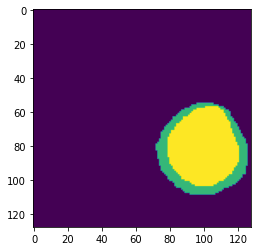

In [16]:
plt.imshow(y[10])

In [15]:
import matplotlib.pylab as plt